In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import PowerTransformer

plt.rcParams['font.family'] = 'AppleGothic' # 한글 폰트 설정
plt.rc('font', size=15)
plt.rcParams['figure.figsize'] = (12, 12) # 그래프 크기 설정

In [2]:
df=pd.read_csv('./중고차데이터최종.csv',encoding='cp949')

In [3]:
df=df.drop(['Unnamed: 0','index'],axis=1)

In [4]:
a=['경승합차','승합차']
b=['SUV','경차','대형차','중형차','소형차','스포츠카','기타','준중형차']
c=['화물차','특장차']

def chg(x):
    if x in a:
        return '승합차'
    elif x in b :
        return '승용차'
    elif x in c:
        return '화물차'

df['차종']=df['차종'].apply(chg)

In [5]:
df

,이름,제조회사,모델명,세부모델,가격,배기량,연식,색상,주행거리,변속기,연료,차종,압류/저당,구동방식,사고유무,전손이력,생산지,신차가격
0,쌍용 티볼리 LX 2WD 세부등급 없음,쌍용,티볼리,티볼리,1360,1597,2017,진주색,40007,자동,휘발유,승용차,0,전륜,1,0,국산차,2050.0
1,기아 올 뉴 모닝 럭셔리,기아,모닝,올 뉴 모닝 (11~15년),670,998,2012,진주색,48280,자동,휘발유,승용차,0,전륜,0,0,국산차,1300.0
2,쉐보레(GM대우) 알페온 EL300 슈프림,쉐보레,알페온,알페온,900,2997,2012,은색,69377,자동,휘발유,승용차,0,전륜,0,0,국산차,3600.0
3,쌍용 렉스턴 스포츠 디젤 2.2 4WD 노블레스,쌍용,렉스턴,렉스턴 스포츠 칸,2420,2157,2019,쥐색,41820,자동,경유,승용차,0,4륜,0,0,국산차,3250.0
4,쉐보레(GM대우) 더 뉴 말리부 1.3 터보 프리미어 세부등급없음,쉐보레,말리부,더 뉴 말리부,2240,1341,2021,검정색,29856,자동,휘발유,승용차,0,전륜,0,0,국산차,3150.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14552,아우디 S4,아우디,S4,S4,1330,2995,2011,0색,87219,자동,휘발유,승용차,0,후륜,0,0,외제차,8000.0
14553,기아 스포티지R,기아,스포티지,스포티지R (10~13년),800,1995,2011,검정색,129430,자동,경유,승용차,0,전륜,1,0,국산차,2500.0
14554,폭스바겐 티구안(1세대),폭스바겐,티구안,티구안 1세대,1030,2000,2014,흰색,167662,자동,경유,승용차,0,전륜,0,0,외제차,4290.0
14555,제네시스 EQ900,제네시스,제네시스,EQ900,3390,5038,2016,검정색,172795,자동,휘발유,승용차,0,후륜,1,0,국산차,9000.0


In [6]:
df.describe()

,가격,배기량,연식,주행거리,압류/저당,사고유무,전손이력,신차가격
count,14557.000000,14557.000000,14557.000000,14557.000000,14557.0,14557.000000,14557.000000,14554.000000
mean,1872.986192,2127.231847,2016.918321,65957.941746,0.0,0.113554,0.000206,3766.176034
std,1469.906807,760.259664,3.133293,53632.481470,0.0,0.317279,0.014355,2526.964898
min,110.000000,0.000000,1991.000000,1.000000,0.0,0.000000,0.000000,0.000000
25%,900.000000,1598.000000,2015.000000,22190.000000,0.0,0.000000,0.000000,2400.000000
50%,1540.000000,1998.000000,2018.000000,57960.000000,0.0,0.000000,0.000000,3144.500000
75%,2399.000000,2400.000000,2019.000000,98022.000000,0.0,0.000000,0.000000,4290.000000
max,30390.000000,20000.000000,2023.000000,508002.000000,0.0,1.000000,1.000000,40000.000000


# 가격

In [7]:
#가격 기초 통계량
df[['가격']].describe()

,가격
count,14557.000000
mean,1872.986192
std,1469.906807
min,110.000000
25%,900.000000
50%,1540.000000
75%,2399.000000
max,30390.000000


Text(0.5, 1.0, 'Q-Q Plot')

/Users/kim/miniforge3/envs/dp/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


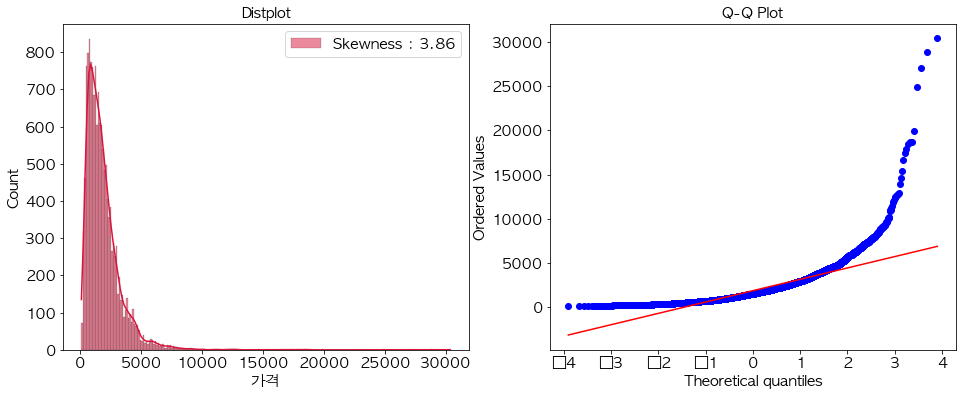

In [8]:
# 가격 분포
fig = plt.figure(figsize = (16,6))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.histplot(df['가격'], ax = ax1, kde=True,color='crimson', label='Skewness : {:.2f}'.format(df['가격'].skew()))
ax1.legend(loc='best', fontsize = 15)
ax1.set_title('Distplot', fontsize = 15)

stats.probplot(df['가격'],dist=stats.norm,plot=ax2)
plt.title("Q-Q Plot", fontsize = 15)

/Users/kim/miniforge3/envs/dp/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


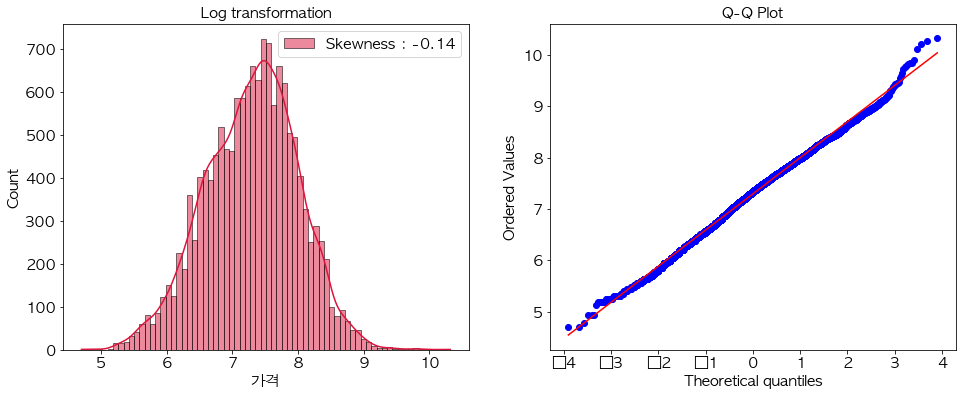

In [9]:
log_trans = df['가격'].map(lambda i: np.log(i) if i > 0 else 0)
fig = plt.figure(figsize = (16,6))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.histplot(log_trans, ax = ax1, kde=True, color='crimson', label='Skewness : {:.2f}'.format(log_trans.skew()))
ax1.legend(loc='best', fontsize = 15)
ax1.set_title('Log transformation', fontsize = 15)

stats.probplot(log_trans, plot = ax2)
ax2.set_title("Q-Q Plot", fontsize = 15)
plt.show()

/Users/kim/miniforge3/envs/dp/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


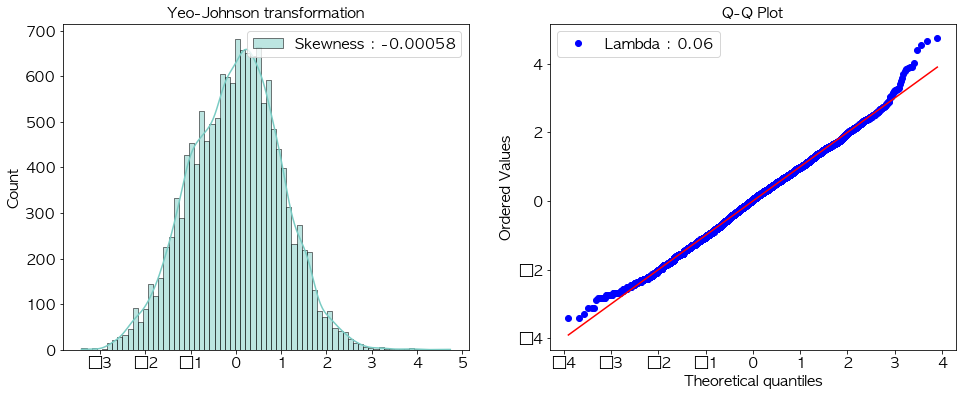

In [10]:
jy = PowerTransformer(method = 'yeo-johnson')
jy.fit(df['가격'].values.reshape(-1, 1))
x_yj = jy.transform(df['가격'].values.reshape(-1, 1))

fig = plt.figure(figsize = (16,6))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.histplot(x_yj, ax = ax1,palette='GnBu',kde=True, label='Skewness : {:.5f}'.format(float(stats.skew(x_yj))))
ax1.legend(loc='best', fontsize = 15)
ax1.set_title('Yeo-Johnson transformation', fontsize = 15)

stats.probplot(x_yj.reshape(x_yj.shape[0]), plot = ax2)
ax2.legend(['Lambda : {:.2f}'.format(float(jy.lambdas_))], loc='best', fontsize = 15)
ax2.set_title("Q-Q Plot", fontsize = 15)
plt.show()

In [11]:
from statsmodels.formula.api import ols

In [12]:
model = ols('가격 ~ 주행거리 + 신차가격 + 배기량 + 사고유무 + 연식', df)

In [13]:
res=model.fit()

In [14]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     가격   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     3519.
Date:                Thu, 19 May 2022   Prob (F-statistic):               0.00
Time:                        13:04:25   Log-Likelihood:            -1.2102e+05
No. Observations:               14554   AIC:                         2.421e+05
Df Residuals:                   14548   BIC:                         2.421e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.524e+05   6840.756    -51.518      0.000   -3.66e+05   -3.39e+05
주행거리          -0.0003      0.000     -1.276      0.202      -0.001       0.000
신차가격           0.3722      0.004     94.856      0.000       0.365       0.380
배기량           -0.0377      0.013     -2.891      0.004      -0.063      -0.012
사고유무         112.4190     26.183      4.294      0.000      61.097     163.741
연식           175.0068      3.388     51.648      0.000     168.365     181.649
==============================================================================
Omnibus:                    11321.583   Durbin-Watson:                   1.375
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1539796.662
Skew:                           2.965   Prob(JB):                         0.00
Kurtosis:                      53.040   Cond. No.                     7.10e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.1e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [16]:
pd.DataFrame({'컬럼': column, 'VIF': variance_inflation_factor(model.exog, i)} 
             for i, column in enumerate(model.exog_names)
             if column != 'Intercept')

,컬럼,VIF
0,주행거리,1.707106
1,신차가격,1.462613
2,배기량,1.463266
3,사고유무,1.026700
4,연식,1.674021


# 모델명

In [17]:
model=df.groupby('모델명')

In [18]:
top20_model=list(model.count().sort_values('이름',ascending=False)[:20].index)

In [19]:
model.count().sort_values('이름',ascending=False)[:20][['이름']]

,이름
모델명,
그랜저,1141
제네시스,918
아반떼,591
쏘렌토,557
카니발,551
쏘나타,522
K5,486
모닝,456
스파크,447


In [20]:
model.mean()[['가격','연식','주행거리']].loc[top20_model]

,가격,연식,주행거리
모델명,,,
그랜저,1864.025416,2017.531989,62118.546889
제네시스,2970.715686,2017.949891,58577.405229
아반떼,1102.345178,2015.901861,68270.372250
쏘렌토,1982.881508,2017.628366,62231.459605
카니발,2052.157895,2017.805808,62432.317604
쏘나타,1461.446360,2016.777778,69611.714559
K5,1513.958848,2017.242798,67882.689300
모닝,708.530702,2015.662281,50528.578947
스파크,779.375839,2016.554810,48239.472036


# 제조회사

In [21]:
#groupby 제조회사
manufacture = df.groupby('제조회사')

Text(0.5, 1.0, '현재 매물 브랜드')

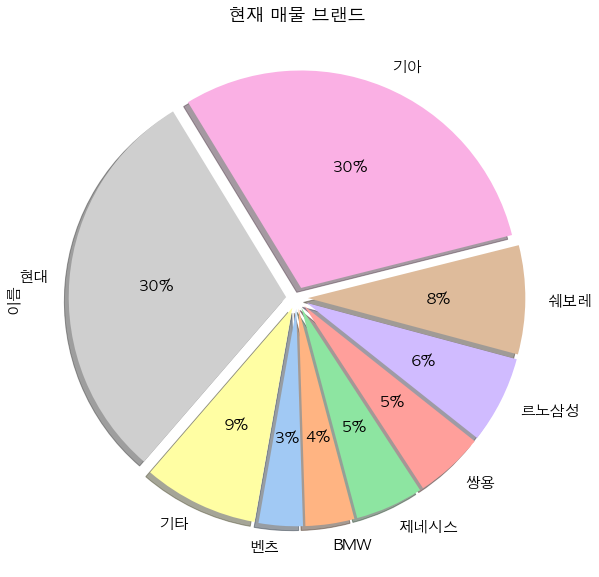

In [22]:
# 브랜드 별 매물 개수
sort_manu=manufacture.count()['이름'].sort_values()
tmp=sort_manu[-8:]
tmp['기타']=sort_manu[1:-8].sum()
sort_manu=tmp
colors=sns.color_palette('pastel')[0:10]
plt.figure(figsize=(10,10))
sort_manu.plot(kind='pie',colors=colors,autopct='%.0f%%',shadow=True,explode=[0.05 for x in range(len(sort_manu))],startangle=260)
plt.title('현재 매물 브랜드')

In [23]:
# 상위 8개 매물 수 평균 가격
manu_price=manufacture.mean()['가격']
pd.DataFrame(manu_price.sort_values()[['현대','기아','쉐보레','르노삼성','쌍용','제네시스','BMW','벤츠']])

,가격
제조회사,
현대,1632.817619
기아,1644.763431
쉐보레,1115.955820
르노삼성,1183.705074
쌍용,1643.672460
제네시스,3303.338315
BMW,3195.595463
벤츠,4091.681342


# 차종

In [24]:
kind=df.groupby('차종')

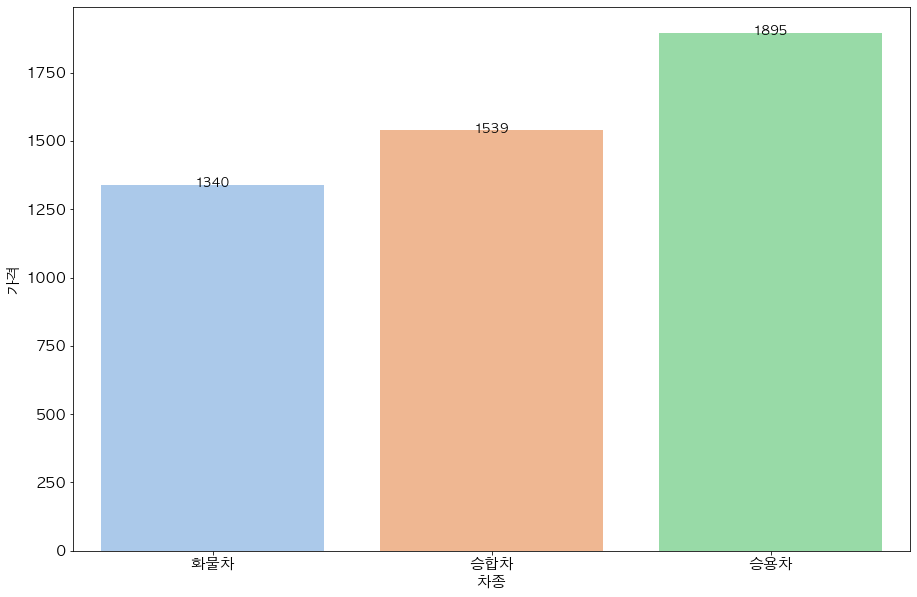

In [25]:
kind_price=kind.mean()
plt.figure(figsize=(15,10))
kind_price=kind_price.sort_values(by='가격')
ax=sns.barplot(x=kind_price.index,y='가격',data=kind_price,color=[],palette='pastel')
for p in ax.patches:
    ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height() - 30),
    ha='center', va='center', fontsize=13, color='black', xytext=(0, 10),
    textcoords='offset points')

In [26]:
kind_dummies=pd.get_dummies(df['차종'])

In [27]:
tempo=pd.concat([df['가격'],kind_dummies],axis=1)

/Users/kim/miniforge3/envs/dp/lib/python3.10/site-packages/seaborn/utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<AxesSubplot:>

/Users/kim/miniforge3/envs/dp/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


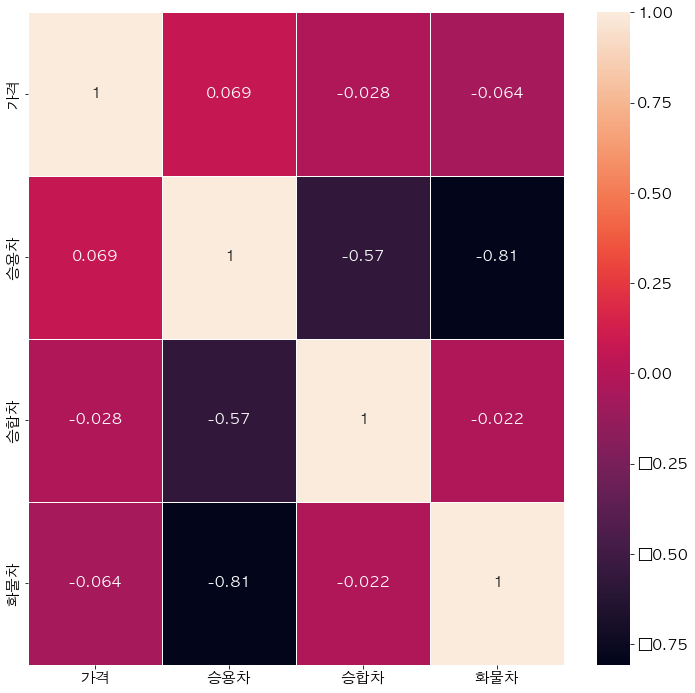

In [28]:
sns.heatmap(tempo.corr(),annot=True,linewidths=.5)

# 주행거리

<AxesSubplot:xlabel='주행거리', ylabel='가격'>

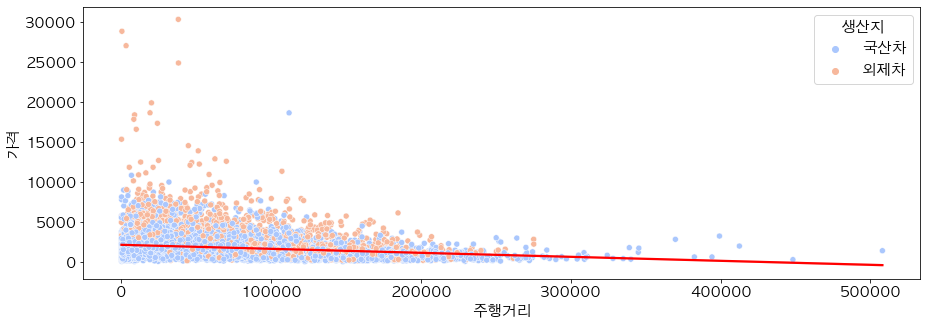

In [29]:
f,axes = plt.subplots(1,1, figsize = (15,5))
sns.regplot(data=df, x='주행거리', y ='가격', marker = '', color = 'r')
sns.scatterplot(data=df, x='주행거리', y ='가격', hue = '생산지', palette = 'coolwarm',legend=True)

# 색상

In [30]:
color=df.groupby('색상')

<AxesSubplot:ylabel='이름'>

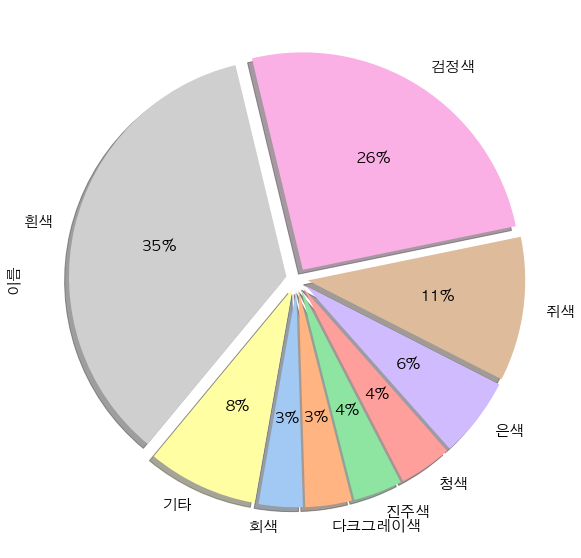

In [31]:
# 색상 별 매물 개수
sort_color=color.count()['이름'].sort_values()
colors=sns.color_palette('pastel')[0:9]
tmp=sort_color[-8:]
tmp['기타']=sort_color[1:-8].sum()
sort_color=tmp
plt.figure(figsize=(10,10))
sort_color.plot(kind='pie',colors=colors,autopct='%.0f%%',startangle=260,shadow=True,explode=[0.05 for x in range(len(sort_color))])

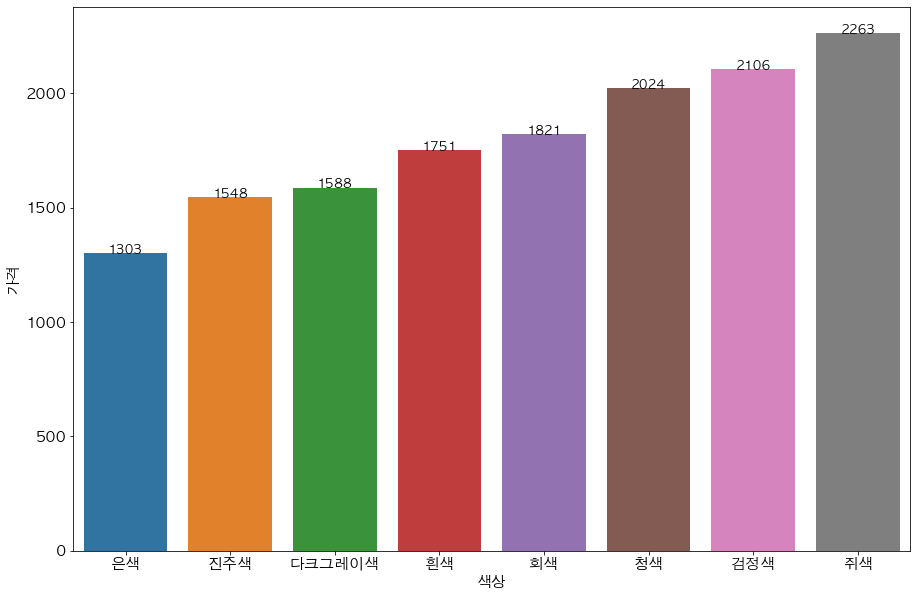

In [32]:
color_price=color.mean()
plt.figure(figsize=(15,10))
color_price=color_price.loc[['흰색','검정색','쥐색','은색','회색','진주색','청색','다크그레이색']]
color_price=color_price.sort_values(by='가격')
ax=sns.barplot(x=color_price.index,y='가격',data=color_price)
for p in ax.patches:
    ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height() - 30),
    ha='center', va='center', fontsize=13, color='black', xytext=(0, 10),
    textcoords='offset points')

In [33]:
color_one_hot=pd.get_dummies(df['색상'])

In [34]:
chk=pd.concat([color_one_hot,df['가격']],axis=1)

/Users/kim/miniforge3/envs/dp/lib/python3.10/site-packages/seaborn/utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


Text(0.5, 1.0, 'Color & Price heatmap')

/Users/kim/miniforge3/envs/dp/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


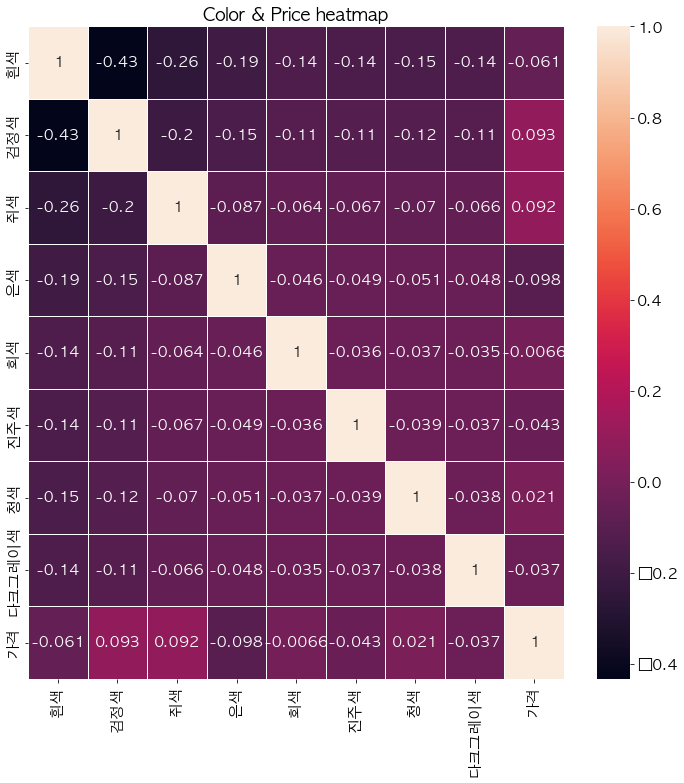

In [35]:
sns.heatmap(chk[['흰색','검정색','쥐색','은색','회색','진주색','청색','다크그레이색','가격']].corr(),annot=True,linewidths=.5)
plt.title('Color & Price heatmap')

# 국산차/외제차

In [36]:
korean_car=df[df['생산지']=='국산차']
foreign_car=df[df['생산지']=='외제차']

In [37]:
foreign_car.describe()

,가격,배기량,연식,주행거리,압류/저당,사고유무,전손이력,신차가격
count,2239.000000,2239.000000,2239.000000,2239.000000,2239.0,2239.000000,2239.000000,2239.000000
mean,3073.072800,2317.161233,2015.988388,83775.436356,0.0,0.092899,0.000893,7212.168379
std,2347.450615,749.252532,3.313504,52388.675149,0.0,0.290355,0.029881,3832.466233
min,220.000000,0.000000,1991.000000,11.000000,0.0,0.000000,0.000000,1100.000000
25%,1590.000000,1984.000000,2014.000000,41791.000000,0.0,0.000000,0.000000,4930.000000
50%,2600.000000,1995.000000,2016.000000,78373.000000,0.0,0.000000,0.000000,6190.000000
75%,3945.000000,2700.000000,2018.000000,118571.000000,0.0,0.000000,0.000000,8700.000000
max,30390.000000,6592.000000,2022.000000,275242.000000,0.0,1.000000,1.000000,40000.000000


In [38]:
korean_car.describe()

,가격,배기량,연식,주행거리,압류/저당,사고유무,전손이력,신차가격
count,12318.000000,12318.000000,12318.000000,12318.000000,12318.0,12318.000000,12318.000000,12315.000000
mean,1654.850625,2092.709044,2017.087352,62719.317746,0.0,0.117308,0.000081,3139.657410
std,1114.780153,757.173267,3.069438,53220.662972,0.0,0.321800,0.009010,1524.950052
min,110.000000,0.000000,1996.000000,1.000000,0.0,0.000000,0.000000,0.000000
25%,840.000000,1597.000000,2015.000000,18384.250000,0.0,0.000000,0.000000,2300.000000
50%,1410.000000,1998.000000,2018.000000,54605.500000,0.0,0.000000,0.000000,3000.000000
75%,2160.000000,2400.000000,2019.000000,94652.750000,0.0,0.000000,0.000000,3600.000000
max,18700.000000,20000.000000,2023.000000,508002.000000,0.0,1.000000,1.000000,10737.000000


Text(0.5, 1.0, '해외 자동차 색깔')

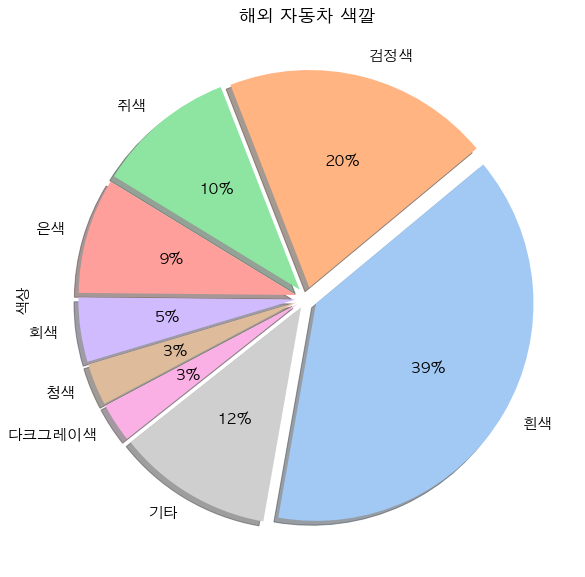

In [39]:
sort_color_foreign=foreign_car['색상'].value_counts()
colors=sns.color_palette('pastel')[0:9]
tmp=sort_color_foreign[:7]
tmp['기타']=sort_color_foreign[7:].sum()
sort_color_foreign=tmp
plt.figure(figsize=(10,10))
ax=sort_color_foreign.plot(kind='pie',colors=colors,autopct='%.0f%%',startangle=260,shadow=True,explode=[0.05 for x in range(len(sort_color_foreign))])
ax.set_title("해외 자동차 색깔")

Text(0.5, 1.0, '국산 자동차 색깔')

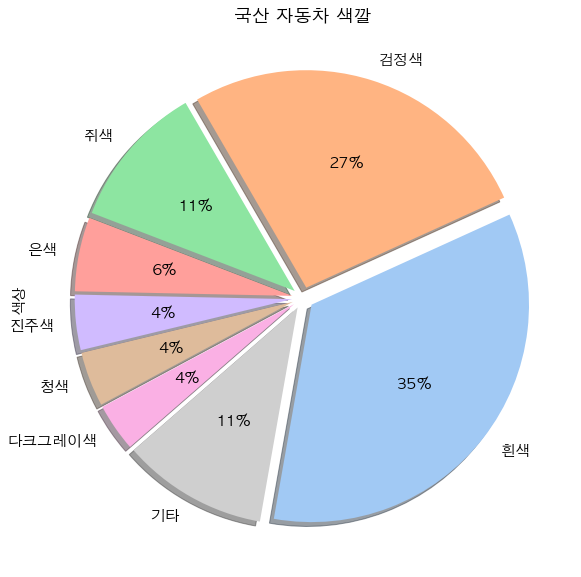

In [40]:
sort_color_korean=korean_car['색상'].value_counts()
colors=sns.color_palette('pastel')[0:9]
tmp=sort_color_korean[:7]
tmp['기타']=sort_color_korean[7:].sum()
sort_color_korean=tmp
plt.figure(figsize=(10,10))
ax=sort_color_korean.plot(kind='pie',colors=colors,autopct='%.0f%%',startangle=260,shadow=True,explode=[0.05 for x in range(len(sort_color_foreign))])
ax.set_title("국산 자동차 색깔")

Text(0.5, 1.0, '국산차 종류')

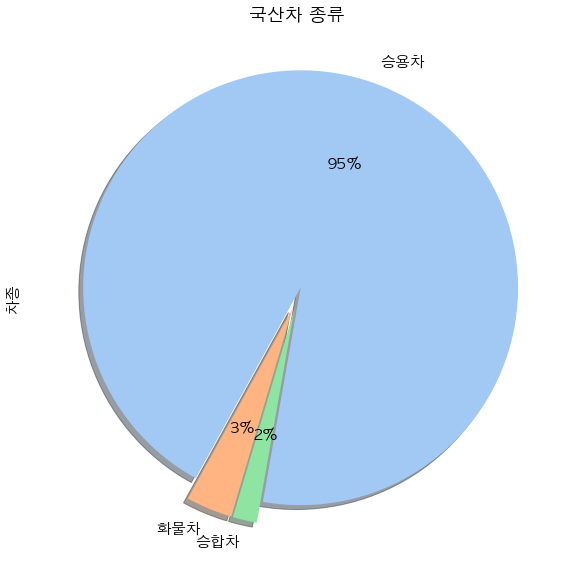

In [41]:
kind_korean=korean_car['차종'].value_counts()
colors=sns.color_palette('pastel')[0:9]
tmp=kind_korean[:7]

kind_korean=tmp
plt.figure(figsize=(10,10))
ax=kind_korean.plot(kind='pie',colors=colors,autopct='%.0f%%',startangle=260,shadow=True,explode=[0.05 for x in range(3)])
ax.set_title("국산차 종류")

Text(0.5, 1.0, '외제차 종류')

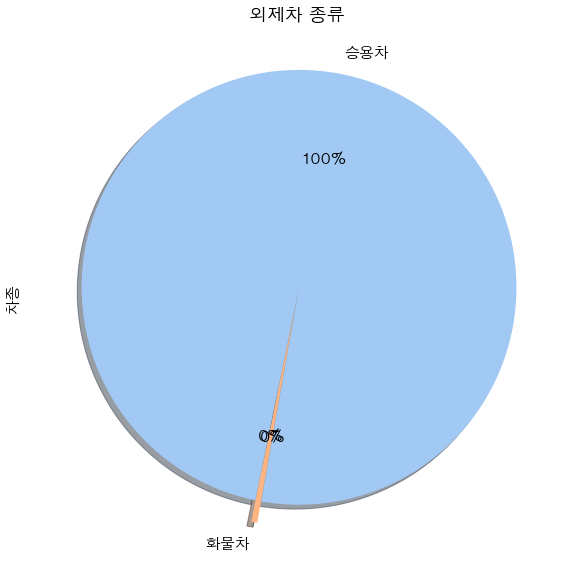

In [42]:
kind_foreign=foreign_car['차종'].value_counts()
colors=sns.color_palette('pastel')[0:9]
tmp=kind_foreign[:7]
tmp['기타']=kind_foreign[7:].sum()
kind_foreign=tmp
plt.figure(figsize=(10,10))
ax=kind_foreign.plot(kind='pie',colors=colors,autopct='%.0f%%',startangle=260,shadow=True,explode=[0.05 for x in range(3)])
ax.set_title("외제차 종류")

In [43]:
korean_car['주행거리'].describe()

count     12318.000000
mean      62719.317746
std       53220.662972
min           1.000000
25%       18384.250000
50%       54605.500000
75%       94652.750000
max      508002.000000
Name: 주행거리, dtype: float64

In [44]:
foreign_car['주행거리'].describe()

count      2239.000000
mean      83775.436356
std       52388.675149
min          11.000000
25%       41791.000000
50%       78373.000000
75%      118571.000000
max      275242.000000
Name: 주행거리, dtype: float64

<AxesSubplot:>

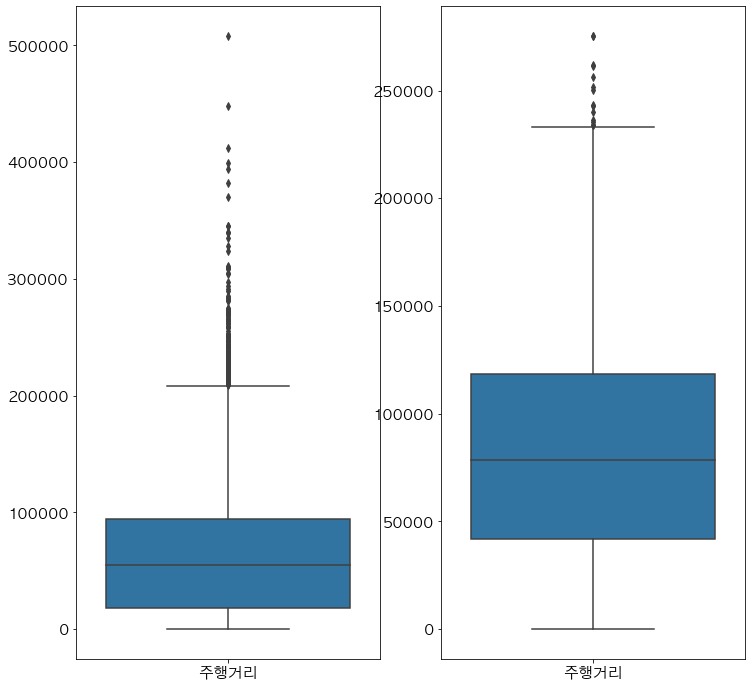

In [45]:
fig, axes = plt.subplots(1, 2)

sns.boxplot(data=korean_car['주행거리'].reset_index().drop('index',axis=1),ax=axes[0])
sns.boxplot(data=foreign_car['주행거리'].reset_index().drop('index',axis=1),ax=axes[1])

# 연료

In [46]:
fuel=df.groupby('연료')

In [47]:
fuel.count()[['이름']]

,이름
연료,
LPG,594
경유,5393
경유+전기,4
수소전기,8
전기,103
하이브리드,608
휘발유,7837
휘발유+LPG,10


In [48]:
fuel.mean()[['가격','연식','주행거리']].iloc[1:]

,가격,연식,주행거리
연료,,,
경유,1913.730020,2016.874096,75697.237345
경유+전기,6800.000000,2018.500000,69738.000000
수소전기,3213.125000,2019.875000,38147.750000
전기,3769.398058,2019.660194,37292.747573
하이브리드,2495.592105,2018.598684,48473.059211
휘발유,1820.208115,2016.805155,59599.571647
휘발유+LPG,791.000000,2015.400000,51984.500000


# 연료+차종

In [49]:
fuel_kind=df.groupby(['연료','차종'])

In [50]:
fuel_kind.count()[3:]

이름  제조회사   모델명  세부모델    가격   배기량    연식    색상  주행거리   변속기  \
연료      차종                                                                
경유      승용차  4827  4827  4827  4827  4827  4827  4827  4827  4827  4827   
        승합차   186   186   186   186   186   186   186   186   186   186   
        화물차   380   380   380   380   380   380   380   380   380   380   
경유+전기   승용차     4     4     4     4     4     4     4     4     4     4   
수소전기    승용차     8     8     8     8     8     8     8     8     8     8   
전기      승용차    87    87    87    87    87    87    87    87    87    87   
        화물차    16    16    16    16    16    16    16    16    16    16   
하이브리드   승용차   606   606   606   606   606   606   606   606   606   606   
        화물차     2     2     2     2     2     2     2     2     2     2   
휘발유     승용차  7824  7824  7824  7824  7824  7824  7824  7824  7824  7824   
        화물차    13    13    13    13    13    13    13    13    13    13   
휘발유+LPG 승용차    10    10    10    10    10    10    10    10    10    10   

             압류/저당  구동방식  사고유무  전손이력   생산지  신차가격  
연료      차종                                        
경유      승용차   4827  4827  4827  4827  4827  4826  
        승합차    186   186   186   186   186   186  
        화물차    380   380   380   380   380   379  
경유+전기   승용차      4     4     4     4     4     4  
수소전기    승용차      8     8     8     8     8     8  
전기      승용차     87    87    87    87    87    87  
        화물차     16    16    16    16    16    16  
하이브리드   승용차    606   606   606   606   606   606  
        화물차      2     2     2     2     2     2  
휘발유     승용차   7824  7824  7824  7824  7824  7823  
        화물차     13    13    13    13    13    13  
휘발유+LPG 승용차     10    10    10    10    10    10

# 구동방식

In [51]:
df['구동방식'].value_counts()

전륜    9139
후륜    3964
4륜    1454
Name: 구동방식, dtype: int64

# 생산지

In [52]:
df['생산지'].value_counts()

국산차    12318
외제차     2239
Name: 생산지, dtype: int64

# 연식

In [53]:
df['연식'].value_counts()

2019    2406
2018    2258
2020    1880
2016    1451
2017    1405
2015    1069
2021     943
2014     866
2012     656
2013     583
2011     354
2010     223
2022     160
2009     124
2008      70
2007      35
1999      20
2006      20
2005      16
2004      10
2003       3
2002       2
2023       1
1991       1
1996       1
Name: 연식, dtype: int64

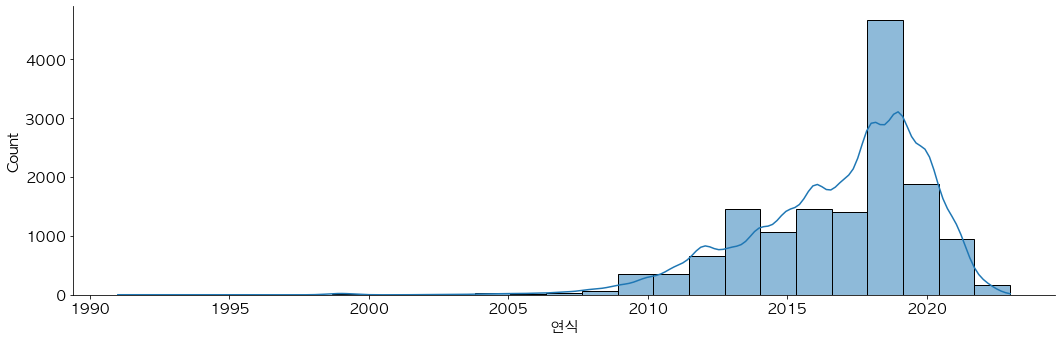

In [54]:
sns.displot(df['연식'],bins=25,height = 5, aspect = 3,kde=True)

In [55]:
df['연식'].describe()

count    14557.000000
mean      2016.918321
std          3.133293
min       1991.000000
25%       2015.000000
50%       2018.000000
75%       2019.000000
max       2023.000000
Name: 연식, dtype: float64

# 구동방식

<AxesSubplot:ylabel='구동방식'>

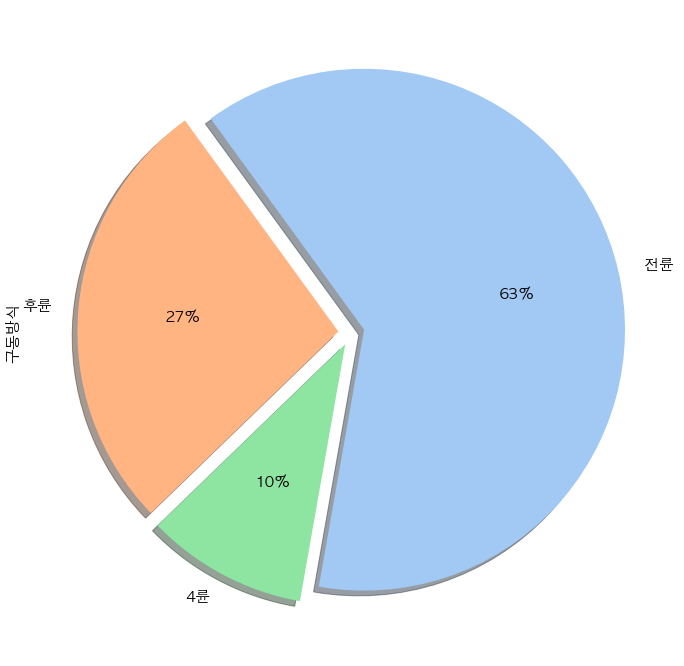

In [56]:
wheel=df['구동방식'].value_counts()
wheel.plot(kind='pie',colors=colors,autopct='%.0f%%',startangle=260,shadow=True,explode=[0.05 for x in range(3)])

/Users/kim/miniforge3/envs/dp/lib/python3.10/site-packages/seaborn/utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<AxesSubplot:>

/Users/kim/miniforge3/envs/dp/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


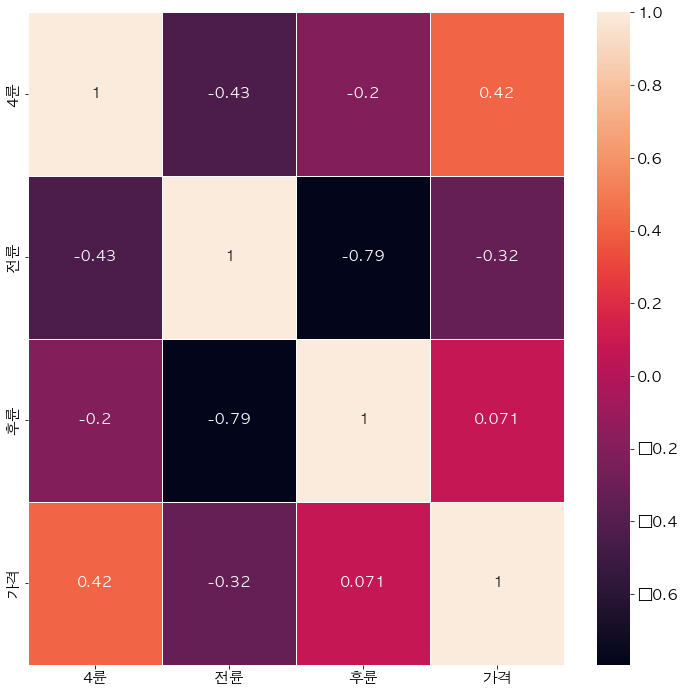

In [57]:
sns.heatmap(pd.concat([pd.get_dummies(df['구동방식']),df['가격']],axis=1).corr(),annot=True,linewidths=0.5)

# 상관 관계

<AxesSubplot:>

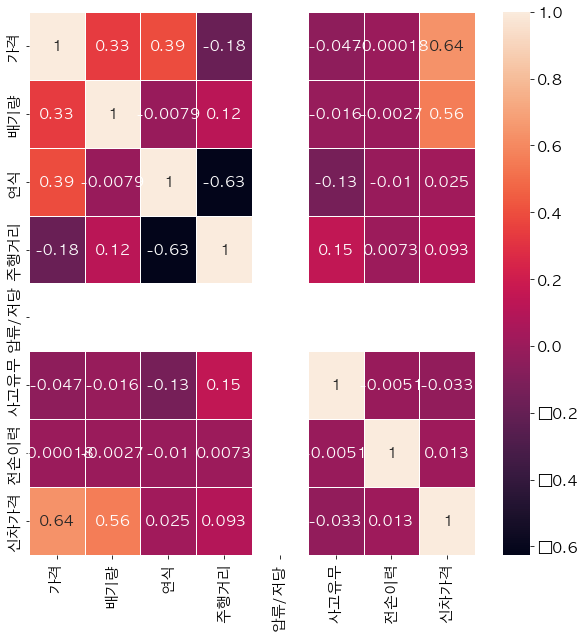

In [58]:
# 상관관계 히트맵
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,linewidths=.5)